In [23]:
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
pd.options.display.max_columns = 30
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
df = pd.read_csv('Seattle_Hotels.csv', encoding="latin-1")
# 数据探索
print(df.head())
print('数据集中的酒店个数：', len(df))

# 创建英文停用词列表
ENGLISH_STOPWORDS = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 
    "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', 
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
    "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}

def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
print('第10个酒店的描述：')
print_description(10)

                             name  \
0  Hilton Garden Seattle Downtown   
1          Sheraton Grand Seattle   
2   Crowne Plaza Seattle Downtown   
3   Kimpton Hotel Monaco Seattle    
4              The Westin Seattle   

                                           address  \
0  1821 Boren Avenue, Seattle Washington 98101 USA   
1   1400 6th Avenue, Seattle, Washington 98101 USA   
2                  1113 6th Ave, Seattle, WA 98101   
3                   1101 4th Ave, Seattle, WA98101   
4   1900 5th Avenue, Seattle, Washington 98101 USA   

                                                desc  
0  Located on the southern tip of Lake Union, the...  
1  Located in the city's vibrant core, the Sherat...  
2  Located in the heart of downtown Seattle, the ...  
3  What?s near our hotel downtown Seattle locatio...  
4  Situated amid incredible shopping and iconic a...  
数据集中的酒店个数： 152
第10个酒店的描述：
Soak up the vibrant scene in the Living Room Bar and get in the mix with our live music and DJ s

feature names:
['00 per night' '000 crystals marble' '000 sq ft' ... 'zoo virginia mason'
 'ändra also offers' 'ändra loft would']
bag of words:
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


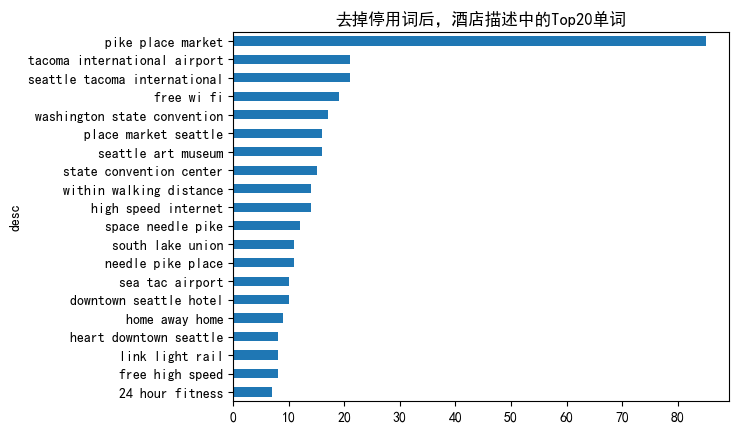

In [24]:
# 得到酒店描述中n-gram特征中的TopK个
def get_top_n_words(corpus, n=1, k=None):
    # 统计ngram词频矩阵，使用自定义停用词列表
    vec = CountVectorizer(ngram_range=(n, n), stop_words=list(ENGLISH_STOPWORDS)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    #"""
    print('feature names:')
    print(vec.get_feature_names_out())
    print('bag of words:')
    print(bag_of_words.toarray())
    #"""
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # 按照词频从大到小排序
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]
common_words = get_top_n_words(df['desc'], 3, 20)
#print(common_words)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.groupby('desc').sum()['count'].sort_values().plot(kind='barh', title='去掉停用词后，酒店描述中的Top20单词')
plt.show()

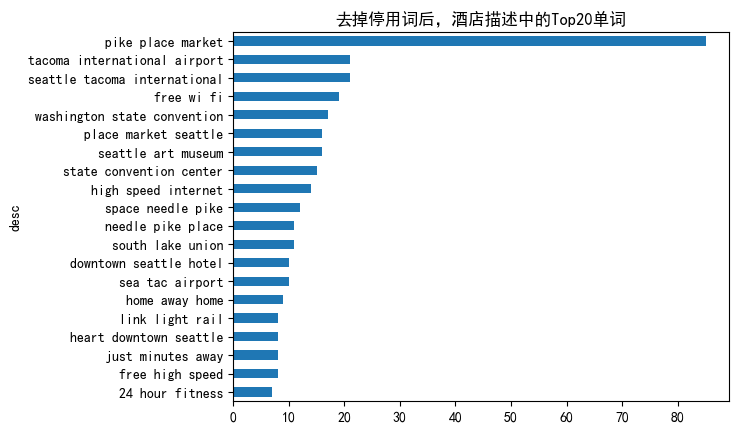

In [9]:
# 得到酒店描述中n-gram特征中的TopK个
def get_top_n_words(corpus, n=1, k=None):
    # 统计ngram词频矩阵
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    """
    print('feature names:')
    print(vec.get_feature_names())
    print('bag of words:')
    print(bag_of_words.toarray())
    """
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # 按照词频从大到小排序
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]
common_words = get_top_n_words(df['desc'], 3, 20)
#print(common_words)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.groupby('desc').sum()['count'].sort_values().plot(kind='barh', title='去掉停用词后，酒店描述中的Top20单词')
plt.show()

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [25]:
# 文本预处理
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
# 使用自定义的英文停用词列表替代nltk的stopwords
STOPWORDS = ENGLISH_STOPWORDS
# 对文本进行清洗
def clean_text(text):
    # 全部小写
    text = text.lower()
    # 用空格替代一些特殊符号，如标点
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    # 移除BAD_SYMBOLS_RE
    text = BAD_SYMBOLS_RE.sub('', text)
    # 从文本中去掉停用词
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
# 对desc字段进行清理，apply针对某列
df['desc_clean'] = df['desc'].apply(clean_text)
#print(df['desc_clean'])

In [ ]:
# 建模
df.set_index('name', inplace = True)
# 使用TF-IDF提取文本特征，使用自定义停用词列表, 1元特征（1000） + 2元特征（1200） + 3元特征（1147）=3347
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0.01, stop_words=list(ENGLISH_STOPWORDS))
# 针对desc_clean提取tfidf
tfidf_matrix = tf.fit_transform(df['desc_clean'])
print('TFIDF feature names:')
#print(tf.get_feature_names_out())
print(len(tf.get_feature_names_out()))
print('tfidf_matrix:')
#print(tfidf_matrix)

TFIDF feature names:
3347
tfidf_matrix:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16877 stored elements and shape (152, 3347)>
  Coords	Values
  (0, 1719)	0.0653556302128929
  (0, 1626)	0.12491293982326873
  (0, 3081)	0.134097856000268
  (0, 1369)	0.07476039423996281
  (0, 1221)	0.07672194770445162
  (0, 1543)	0.049246645770058876
  (0, 2523)	0.04723838259568511
  (0, 820)	0.03267781510644645
  (0, 1413)	0.027559455988603942
  (0, 2190)	0.08406257987423404
  (0, 435)	0.08558268592593565
  (0, 1653)	0.067048928000134
  (0, 2018)	0.057864011823134734
  (0, 1387)	0.04979549787130613
  (0, 1781)	0.07132229854860234
  (0, 1564)	0.05628009710194575
  (0, 622)	0.08406257987423404
  (0, 1519)	0.050359388872797
  (0, 174)	0.06462486666561425
  (0, 1248)	0.0872351140221
  (0, 367)	0.09098742549726888
  (0, 1877)	0.09098742549726888
  (0, 1223)	0.0872351140221
  (0, 1127)	0.09098742549726888
  (0, 867)	0.0788903444584315
  :	:
  (151, 466)	0.11264376737990651
  (151, 589)	0.10

In [30]:
# 计算酒店之间的余弦相似度（线性核函数）
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_similarities)
print(cosine_similarities.shape)
indices = pd.Series(df.index) #df.index是酒店名称

[[1.         0.03930478 0.09970189 ... 0.04875507 0.02296214 0.0262131 ]
 [0.03930478 1.         0.05892777 ... 0.06130707 0.01516305 0.03543109]
 [0.09970189 0.05892777 1.         ... 0.08718294 0.04218405 0.04985284]
 ...
 [0.04875507 0.06130707 0.08718294 ... 1.         0.05751589 0.03948025]
 [0.02296214 0.01516305 0.04218405 ... 0.05751589 1.         0.01602277]
 [0.0262131  0.03543109 0.04985284 ... 0.03948025 0.01602277 1.        ]]
(152, 152)


In [31]:
# 基于相似度矩阵和指定的酒店name，推荐TOP10酒店
def recommendations(name, cosine_similarities = cosine_similarities):
    recommended_hotels = []
    # 找到想要查询酒店名称的idx
    idx = indices[indices == name].index[0]
    print('idx=', idx)
    # 对于idx酒店的余弦相似度向量按照从大到小进行排序
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)
    # 取相似度最大的前10个（除了自己以外）
    top_10_indexes = list(score_series.iloc[1:11].index)
    # 放到推荐列表中
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
    return recommended_hotels
print(recommendations('Hilton Seattle Airport & Conference Center'))
print(recommendations('The Bacon Mansion Bed and Breakfast'))


idx= 49
['Embassy Suites by Hilton Seattle Tacoma International Airport', 'DoubleTree by Hilton Hotel Seattle Airport', 'Seattle Airport Marriott', 'Four Points by Sheraton Downtown Seattle Center', 'Motel 6 Seattle Sea-Tac Airport South', 'Hampton Inn Seattle/Southcenter', 'Radisson Hotel Seattle Airport', 'Knights Inn Tukwila', 'Hotel Hotel', 'Home2 Suites by Hilton Seattle Airport']
idx= 116
['11th Avenue Inn Bed and Breakfast', 'Shafer Baillie Mansion Bed & Breakfast', 'Gaslight Inn', 'Bed and Breakfast Inn Seattle', 'Chittenden House Bed and Breakfast', 'Hyatt House Seattle', 'Mozart Guest House', 'Silver Cloud Hotel - Seattle Broadway', 'WorldMark Seattle - The Camlin', 'Pensione Nichols Bed and Breakfast']
